# import libarary

In [1]:
from sklearn.svm import SVC
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
#from keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import np_utils
from tensorflow.keras.utils import to_categorical
#from keras.models import Sequential

# Image processing test

In [82]:

"""
test=Image.open("a1.JPG")
test_np=np.array(test)
print(test_np.shape)
test_re=test.resize((256,256))
test_re_np=np.array(test_re)
print(test_re_np.shape)
img = tf.image.convert_image_dtype(img, tf.float32)
"""


'\ntest=Image.open("a1.JPG")\ntest_np=np.array(test)\nprint(test_np.shape)\ntest_re=test.resize((256,256))\ntest_re_np=np.array(test_re)\nprint(test_re_np.shape)\nimg = tf.image.convert_image_dtype(img, tf.float32)\n'

In [48]:
type(img)

numpy.ndarray

In [49]:
type(data_x[0])

numpy.ndarray

In [58]:
img.shape

(1, 64, 64, 3)

In [54]:
type(test)

PIL.JpegImagePlugin.JpegImageFile

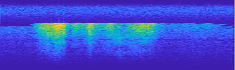

In [242]:
img=Image.open('a'+str(1)+".JPG")
img=img.resize((235,70))
img

# Make dataset

In [2]:
word={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25}

## color

In [3]:
data_x=[]
data_y=[]
test_x=[]
test_y=[]
for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
    for j in range(1,7):
        #print(i+str(j)+".JPG")
        temp=Image.open(i+str(j)+".jpg")
        #temp=Image.open("data\\"+i+str(j)+".JPG")
        temp=temp.resize((235,145))
        temp_np=np.array(temp)
        
        #temp_np=temp_np.reshape(-1)
        if(j==6):
            test_x.append(temp_np)
            test_y.append(word[i])
        else:
            data_x.append(temp_np)
            data_y.append(word[i])
            
test_x=np.array(test_x)
test_y=np.array(test_y)
data_x=np.array(data_x)
data_y=np.array(data_y)


test_y = to_categorical(test_y,num_classes=26)
data_y = to_categorical(data_y,num_classes=26)

In [3]:
data_x=[]
data_y=[]
test_x=[]
test_y=[]
for j in range(1,7):
    for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
        #print(i+str(j)+".JPG")
        temp=Image.open(i+str(j)+".jpg")
        #temp=Image.open("data\\"+i+str(j)+".JPG")
        temp=temp.resize((235,145))
        temp_np=np.array(temp)
        
        #temp_np=temp_np.reshape(-1)
        if(j==6):
            test_x.append(temp_np)
            test_y.append(word[i])
        else:
            data_x.append(temp_np)
            data_y.append(word[i])
            
test_x=np.array(test_x)
test_y=np.array(test_y)
data_x=np.array(data_x)
data_y=np.array(data_y)

#normalization
data_x = data_x.astype('float32')/255
test_x = test_x.astype('float32')/255

test_y = to_categorical(test_y,num_classes=26)
data_y = to_categorical(data_y,num_classes=26)


## gray scale

In [154]:
data_x=[]
data_y=[]
test_x=[]
test_y=[]
for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
    for j in range(1,6):
        #print(i+str(j)+".JPG")
        temp=Image.open("data\\"+i+str(j)+".JPG")
        temp=temp.resize((90,30))
        temp=temp.convert('L') #흑백여부
        
        temp_np=np.array(temp)
        #temp_np = temp_np.reshape((1,)+temp_np.shape)
        temp_np=temp_np.reshape(30,90,1)
        if(j==5):
            test_x.append(temp_np)
            test_y.append(word[i])
        else:
            data_x.append(temp_np)
            data_y.append(word[i])
            
test_x=np.array(test_x)
test_y=np.array(test_y)
data_x=np.array(data_x)
data_y=np.array(data_y)


test_y = to_categorical(test_y,num_classes=26)
data_y = to_categorical(data_y,num_classes=26)

-----------------------------

In [103]:
data_x.shape

(104, 30, 90, 3)

In [128]:
data_x[0].shape

(30, 90, 1)

In [87]:
data_x[0].shape

(64, 64, 3)

In [34]:
data_y[0]

'a'

In [10]:
data_y[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [90]:
test_x[0]

array([[[0.12156863, 0.26666668, 0.7882353 ],
        [0.13333334, 0.2509804 , 0.7764706 ],
        [0.18039216, 0.2901961 , 0.8117647 ],
        ...,
        [0.15294118, 0.23529412, 0.7372549 ],
        [0.15686275, 0.20784314, 0.7490196 ],
        [0.17254902, 0.22352941, 0.77254903]],

       [[0.1254902 , 0.5176471 , 0.95686275],
        [0.10980392, 0.4862745 , 0.9254902 ],
        [0.13333334, 0.5294118 , 0.94509804],
        ...,
        [0.16862746, 0.49019608, 0.92941177],
        [0.19607843, 0.4509804 , 0.94509804],
        [0.22745098, 0.48235294, 0.9843137 ]],

       [[0.15686275, 0.46666667, 0.93333334],
        [0.1254902 , 0.42745098, 0.8901961 ],
        [0.17254902, 0.5176471 , 0.9490196 ],
        ...,
        [0.19215687, 0.50980395, 0.9607843 ],
        [0.2509804 , 0.44313726, 0.95686275],
        [0.16470589, 0.3137255 , 0.8509804 ]],

       ...,

       [[0.2627451 , 0.13333334, 0.73333335],
        [0.2627451 , 0.13333334, 0.73333335],
        [0.25490198, 0

In [33]:
test_y[0]

'a'

In [207]:
data_x[0].shape

(70, 235, 3)

In [213]:
data_y.shape

(104,)

In [218]:
len(word)

26

# Train CNN

## Build model

### LeNet5

In [219]:
model=Sequential()
model.add(Conv2D(6, kernel_size=(5,5), strides=1,  activation='tanh', input_shape=data_x[0].shape, padding='same')) #C1
model.add(AveragePooling2D(pool_size=(2,2))) #S2
model.add(Conv2D(16, kernel_size=(5,5), strides=1, activation='tanh', padding='valid')) #C3
model.add(AveragePooling2D(pool_size=(2,2))) #S4
model.add(Flatten()) #Flatten
model.add(Dense(120, activation='tanh')) #C5
model.add(Dense(84, activation='tanh')) #F6
model.add(Dense(len(word), activation='softmax')) #Output layer



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### LeNet5 -2 

In [4]:
model = Sequential()
model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=data_x[0].shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(50, kernel_size = 5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dense(26))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

### test

In [197]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same',
                input_shape=(data_x.shape[1], data_x.shape[2], data_x.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(26, activation='softmax'))


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## compile and fit

In [5]:
history = model.fit(data_x, data_y, 
                    epochs=100, batch_size=26)

Train on 130 samples
Epoch 1/100
130/130 [==============================] - 9s 69ms/sample - loss: 7.0258 - accuracy: 0.0385
Epoch 2/100
130/130 [==============================] - 9s 72ms/sample - loss: 3.2541 - accuracy: 0.0308
Epoch 3/100
130/130 [==============================] - 9s 70ms/sample - loss: 3.2245 - accuracy: 0.1154
Epoch 4/100
130/130 [==============================] - 10s 76ms/sample - loss: 3.1090 - accuracy: 0.1231
Epoch 5/100
130/130 [==============================] - 9s 72ms/sample - loss: 2.7101 - accuracy: 0.3923
Epoch 6/100
130/130 [==============================] - 9s 72ms/sample - loss: 2.0540 - accuracy: 0.4538
Epoch 7/100
130/130 [==============================] - 11s 82ms/sample - loss: 1.4974 - accuracy: 0.5538
Epoch 8/100
130/130 [==============================] - 8s 60ms/sample - loss: 1.0588 - accuracy: 0.6615
Epoch 9/100
130/130 [==============================] - 8s 61ms/sample - loss: 0.7965 - accuracy: 0.7231
Epoch 10/100
130/130 [===================

130/130 [==============================] - 8s 60ms/sample - loss: 1.5344e-04 - accuracy: 1.0000
Epoch 77/100
130/130 [==============================] - 8s 60ms/sample - loss: 1.5063e-04 - accuracy: 1.0000
Epoch 78/100
130/130 [==============================] - 8s 60ms/sample - loss: 1.4763e-04 - accuracy: 1.0000
Epoch 79/100
130/130 [==============================] - 8s 61ms/sample - loss: 1.4479e-04 - accuracy: 1.0000
Epoch 80/100
130/130 [==============================] - 8s 60ms/sample - loss: 1.4214e-04 - accuracy: 1.0000
Epoch 81/100
130/130 [==============================] - 8s 59ms/sample - loss: 1.3965e-04 - accuracy: 1.0000
Epoch 82/100
130/130 [==============================] - 8s 60ms/sample - loss: 1.3692e-04 - accuracy: 1.0000
Epoch 83/100
130/130 [==============================] - 8s 59ms/sample - loss: 1.3459e-04 - accuracy: 1.0000
Epoch 84/100
130/130 [==============================] - 8s 60ms/sample - loss: 1.3213e-04 - accuracy: 1.0000
Epoch 85/100
130/130 [==========

## get score

### color

In [6]:
result = model.predict_classes(test_x)

In [232]:
result
answer = []
for i in test_y:
    answer.append(i)

test_y_label = []
for y in test_y:
    test_y_label.append(y)

accuracy_score(test_y, result)

0.23076923076923078

In [233]:
for i in enumerate(test_y):
    print('real:',list(word.keys())[i[1]],'| predict:',list(word.keys())[result[i[0]]])

real: a | predict: a
real: b | predict: u
real: c | predict: c
real: d | predict: o
real: e | predict: e
real: f | predict: g
real: g | predict: d
real: h | predict: v
real: i | predict: v
real: j | predict: j
real: k | predict: q
real: l | predict: c
real: m | predict: b
real: n | predict: o
real: o | predict: o
real: p | predict: m
real: q | predict: o
real: r | predict: r
real: s | predict: g
real: t | predict: n
real: u | predict: m
real: v | predict: r
real: w | predict: n
real: x | predict: y
real: y | predict: r
real: z | predict: v


In [16]:
np.argmax(test_y[0])

0

In [25]:
test_x

array([[[[0.22745098, 0.11764706, 0.69411767],
         [0.22745098, 0.11764706, 0.69411767],
         [0.22352941, 0.11372549, 0.6901961 ],
         ...,
         [0.26666668, 0.10196079, 0.6745098 ],
         [0.26666668, 0.10196079, 0.6745098 ],
         [0.26666668, 0.10196079, 0.6745098 ]],

        [[0.23137255, 0.11372549, 0.6862745 ],
         [0.23137255, 0.11372549, 0.6862745 ],
         [0.22745098, 0.10980392, 0.68235296],
         ...,
         [0.2627451 , 0.10980392, 0.6784314 ],
         [0.27058825, 0.10588235, 0.6784314 ],
         [0.2627451 , 0.10980392, 0.6784314 ]],

        [[0.23921569, 0.11372549, 0.68235296],
         [0.23921569, 0.11372549, 0.68235296],
         [0.23529412, 0.10980392, 0.6784314 ],
         ...,
         [0.2509804 , 0.10588235, 0.6627451 ],
         [0.2509804 , 0.10588235, 0.6627451 ],
         [0.2509804 , 0.10588235, 0.6627451 ]],

        ...,

        [[0.23921569, 0.11372549, 0.68235296],
         [0.23921569, 0.11372549, 0.68235296]

In [29]:

result = model.predict_classes(test_x)



test_y_label = []
for y in test_y:
    test_y_label.append(np.argmax(y))

accuracy_score(test_y_label, result)

0.19230769230769232

In [30]:
for i in enumerate(test_y_label):
    if i[1]==result[i[0]]:
        print(list(word.keys())[i[1]])

c
o
p
r
t


In [ ]:
for i in enumerate(test_y_label):
    print('real:',list(word.keys())[i[1]],'| predict:',list(word.keys())[result[i[0]]])

### gray scale

In [8]:
result = model.predict_classes(test_x)

answer = []
for i in test_y:
    answer.append(np.argmax(i))

test_y_label = []
for y in test_y:
    test_y_label.append(np.argmax(y))

accuracy_score(test_y_label, result)

0.0

In [9]:
for i in enumerate(test_y_label):
    if i[1]==result[i[0]]:
        print(list(word.keys())[i[1]])

In [161]:
for i in enumerate(test_y_label):
    print('real:',list(word.keys())[i[1]],'| predict:',list(word.keys())[result[i[0]]])

real: a | predict: a
real: b | predict: a
real: c | predict: c
real: d | predict: e
real: e | predict: c
real: f | predict: g
real: g | predict: d
real: h | predict: v
real: i | predict: v
real: j | predict: j
real: k | predict: p
real: l | predict: c
real: m | predict: a
real: n | predict: d
real: o | predict: l
real: p | predict: b
real: q | predict: z
real: r | predict: r
real: s | predict: g
real: t | predict: n
real: u | predict: a
real: v | predict: d
real: w | predict: s
real: x | predict: y
real: y | predict: r
real: z | predict: y


--------------------------

In [123]:
for i in enumerate(test_y_label):
    print('real:',list(word.keys())[i[1]],'predict:',list(word.keys())[result[i[0]]])
    #if i[1]==result[i[0]]:
        #print(list(word.keys())[i[1]])

c
h
i
j
r
w
x
z


In [114]:
enumerate(test_y_label)

TypeError: 'enumerate' object is not subscriptable

In [112]:
test_y_label[0]

0

In [109]:
result

array([ 4, 12,  2, 11,  2, 24,  3,  7,  8,  9, 15,  2,  1,  3, 11, 23, 25,
       17, 25, 13, 12, 17, 22, 23, 17, 25], dtype=int64)

In [122]:
list(word.keys())

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [15]:
test_x[0].shape

(64, 64, 3)

In [1]:
test_x_ = test_x.astype('float')

NameError: name 'test_x' is not defined

In [51]:
lin=SVC().fit(data_x,data_y)

C:\Users\gosan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
pred_y=lin.predict(test_x)

In [47]:
accuracy_score(test_y,pred_y)

0.19230769230769232

In [48]:
test_y

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [49]:
pred_y

array(['e', 'a', 'c', 'o', 'c', 'y', 'p', 'v', 'i', 'j', 'f', 'e', 'h',
       'd', 'o', 'k', 'z', 'r', 'o', 'l', 'e', 'o', 'i', 'i', 'i', 'u'],
      dtype='<U1')

## 흑백변환

In [53]:
accuracy_score(test_y,pred_y)

0.23076923076923078

In [55]:
pred_y

array(['o', 'a', 'c', 'o', 'c', 'y', 'p', 'v', 'i', 'j', 'f', 'e', 'h',
       'd', 'o', 'k', 'q', 'r', 'o', 'n', 'e', 'o', 'i', 'i', 'i', 'u'],
      dtype='<U1')